In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow
from glob import glob
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [67]:
#Scale the pixel values of the images from a range of [0, 255] to [0, 1].
#Use 80% of the images for training and 20% for validation
datagen = ImageDataGenerator(rescale=1/255, validation_split=None)

The Data Structure
Incorect: MC= 2500 , mmc =2500
With_mask: com = 789 , simple = 4000
Without_mask: com= 747, simple= 4000

First we will use ImageDataGenerator a class in the Keras library for deep learning, which is used to preprocess image data. The flow_from_directory method is used to generate batches of image data from a directory containing subdirectories of images, with each subdirectory representing a class label. The method takes the path to the directory containing the images as an argument.

In [68]:
data= datagen.flow_from_directory("FMD_DATASET",shuffle=True,seed=42)
#enable shuffling of the data each time the generator yields a batch of data

Found 14536 images belonging to 3 classes.


DATA DETAILS

In [69]:
counts = np.bincount(data.labels)
print("classes: ",data.class_indices,
      "\nimage shape: ", data.image_shape,
      "\n  * class 'incorrect_mask' (0): ", counts[0],
      "\n  * class 'with_mask' (1): ", counts[1],
      "\n  * class 'without_mask' (2): ", counts[2],)

classes:  {'incorrect_mask': 0, 'with_mask': 1, 'without_mask': 2} 
image shape:  (256, 256, 3) 
  * class 'incorrect_mask' (0):  5000 
  * class 'with_mask' (1):  4789 
  * class 'without_mask' (2):  4747


In [70]:
data.image_shape

(256, 256, 3)

In [71]:
data.labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

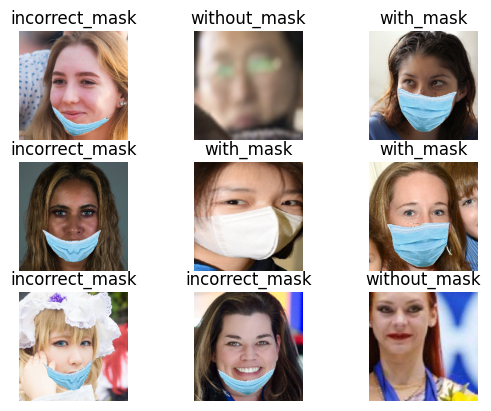

In [72]:

image_batch, labels_batch = data.next()

for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(image_batch[i])
      label = labels_batch[i]
      if np.array_equal(label, np.array([1., 0., 0.])):
            plt.title('incorrect_mask')
      elif np.array_equal(label, np.array([0., 1., 0.])):
            plt.title('with_mask')
      else:
            plt.title('without_mask')
      plt.axis("off")

In [73]:
data_pca = datagen.flow_from_directory("FMD_DATASET",target_size=(28,28),
                                         batch_size=500,color_mode='grayscale',shuffle='true', seed=42)
for i in range(13):
    x_batch, y_batch = next(data_pca)
    reduce_data = x_batch.reshape(x_batch.shape[0], -1)
    y_batch = np.argmax(y_batch, axis=1)
    pca = PCA()
    pca.fit(reduce_data)
    var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
    k = np.argmax(var_cumu>95)
    print("iter: ",i, " k for 95%: ", k)

Found 14536 images belonging to 3 classes.
iter:  0  k for 95%:  166
iter:  1  k for 95%:  167
iter:  2  k for 95%:  168
iter:  3  k for 95%:  163
iter:  4  k for 95%:  166
iter:  5  k for 95%:  170
iter:  6  k for 95%:  165


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


iter:  7  k for 95%:  167
iter:  8  k for 95%:  167
iter:  9  k for 95%:  170
iter:  10  k for 95%:  164
iter:  11  k for 95%:  167
iter:  12  k for 95%:  160


In [74]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='hinge', penalty='l2',alpha=0.05, random_state=42, max_iter=5, tol=None)
data_train = datagen.flow_from_directory("FMD_DATASET",target_size=(28,28),
                                          batch_size=500,color_mode='grayscale',shuffle='true',seed=42)
k=171
pca = PCA(n_components=k)
for i in range(26):
    x_batch, y_batch = next(data_train)
    reduce_data = x_batch.reshape(x_batch.shape[0], -1)
    y_batch = np.argmax(y_batch, axis=1)
    data_k_features = pca.fit_transform(reduce_data)
    # X_train, X_test, y_train, y_test = train_test_split(data_k_features, y_batch, test_size=0.2, random_state=42)
    clf.partial_fit(data_k_features, y_batch, classes=np.unique(y_batch))
    y_pred = clf.predict(data_k_features)
    print("Accuracy for iteration :",i, "is:", accuracy_score(y_batch, y_pred))


Found 14536 images belonging to 3 classes.
Accuracy for iteration : 0 is: 0.722
Accuracy for iteration : 1 is: 0.77
Accuracy for iteration : 2 is: 0.758
Accuracy for iteration : 3 is: 0.718
Accuracy for iteration : 4 is: 0.708
Accuracy for iteration : 5 is: 0.74
Accuracy for iteration : 6 is: 0.706


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Accuracy for iteration : 7 is: 0.698
Accuracy for iteration : 8 is: 0.692
Accuracy for iteration : 9 is: 0.654
Accuracy for iteration : 10 is: 0.668
Accuracy for iteration : 11 is: 0.664
Accuracy for iteration : 12 is: 0.674
Accuracy for iteration : 13 is: 0.628
Accuracy for iteration : 14 is: 0.644
Accuracy for iteration : 15 is: 0.636
Accuracy for iteration : 16 is: 0.646
Accuracy for iteration : 17 is: 0.622
Accuracy for iteration : 18 is: 0.61
Accuracy for iteration : 19 is: 0.648
Accuracy for iteration : 20 is: 0.616
Accuracy for iteration : 21 is: 0.544
Accuracy for iteration : 22 is: 0.606
Accuracy for iteration : 23 is: 0.624
Accuracy for iteration : 24 is: 0.602
Accuracy for iteration : 25 is: 0.62


In [75]:
X_batch , Y_batch = next(data_train)
#result = np.concatenate((array1, array2), axis=0)
for i in range(2):
 x_batch, y_batch = next(data_train)
 res_x = np.concatenate((X_batch,x_batch),axis=0)
 X_batch = res_x
 res_y = np.concatenate((Y_batch,y_batch),axis=0)
 Y_batch = res_y

print(X_batch.shape, Y_batch.shape)

(1500, 28, 28, 1) (1500, 3)


In [76]:
reduce_data = X_batch.reshape(X_batch.shape[0], -1)
y_batch = np.argmax(Y_batch, axis=1)
print(reduce_data.shape,y_batch.shape)
data_k_features = pca.fit_transform(reduce_data)

y_pred = clf.predict(data_k_features)
accuracy = accuracy_score(y_batch, y_pred)
print("Accuracy:", accuracy)

(1500, 784) (1500,)
Accuracy: 0.378
